# SVM

<img src="img/SVM.png" width="700" height="700">

# slack variable
$$L = \dfrac{1}{2} ||w||^2 - \sum_{i=1}^N a_i (y_i \cdot ( w^Tx_i - w_o) - 1 + \xi_i ) - \sum_{i=1}^N \mu_i \xi_i  + C \sum_{i=1}^N \xi_i$$
<img src="img/slack.png" width="700" height="700">

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [61]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
from matplotlib.colors import ListedColormap
%matplotlib inline

In [63]:
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=range(105, 150)):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')

In [64]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

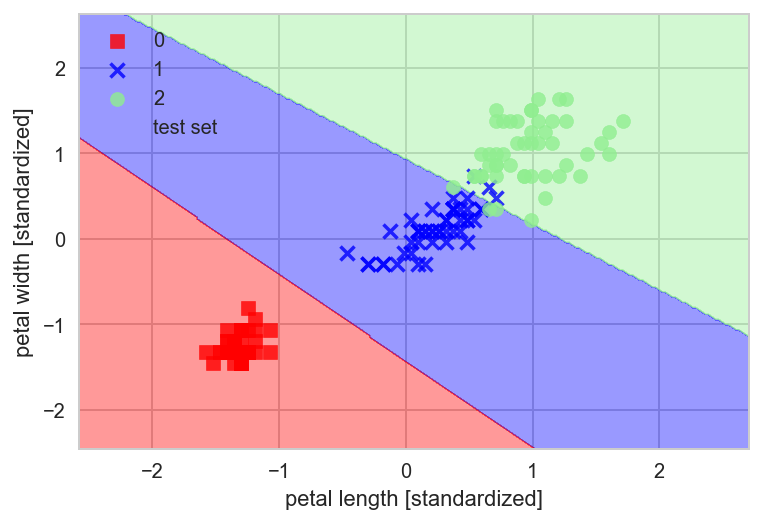

In [65]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## olivetti_face_recognition

In [66]:
from sklearn.datasets import fetch_olivetti_faces

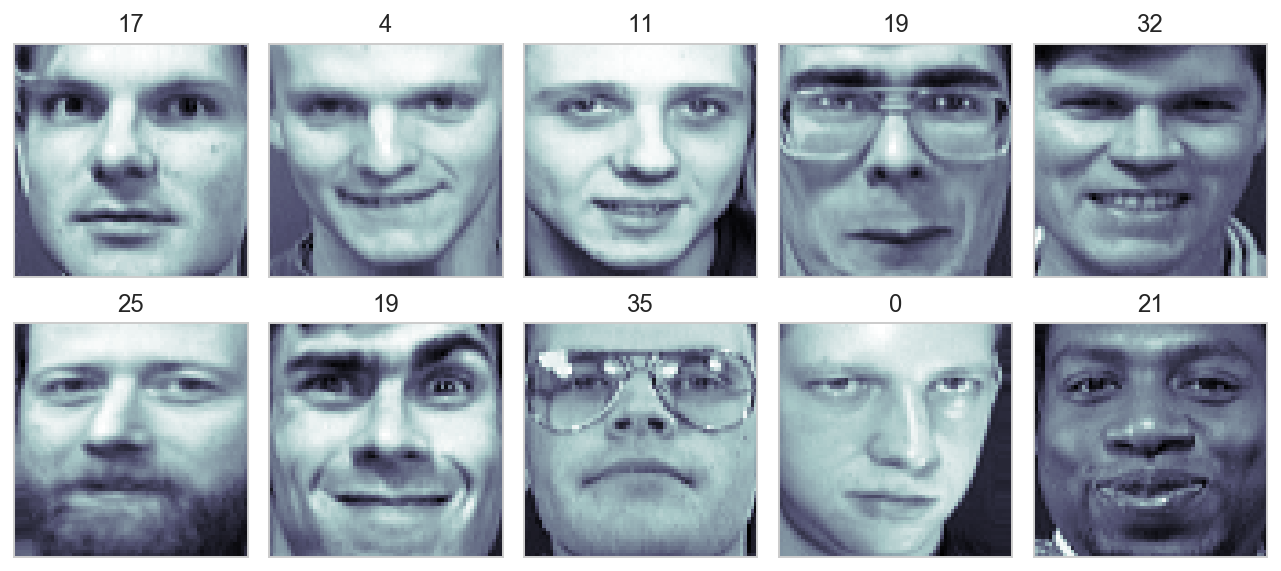

In [68]:
faces = fetch_olivetti_faces()

N = 2 ; M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [71]:
svc_1 = SVC(kernel='linear').fit(X_train, y_train)

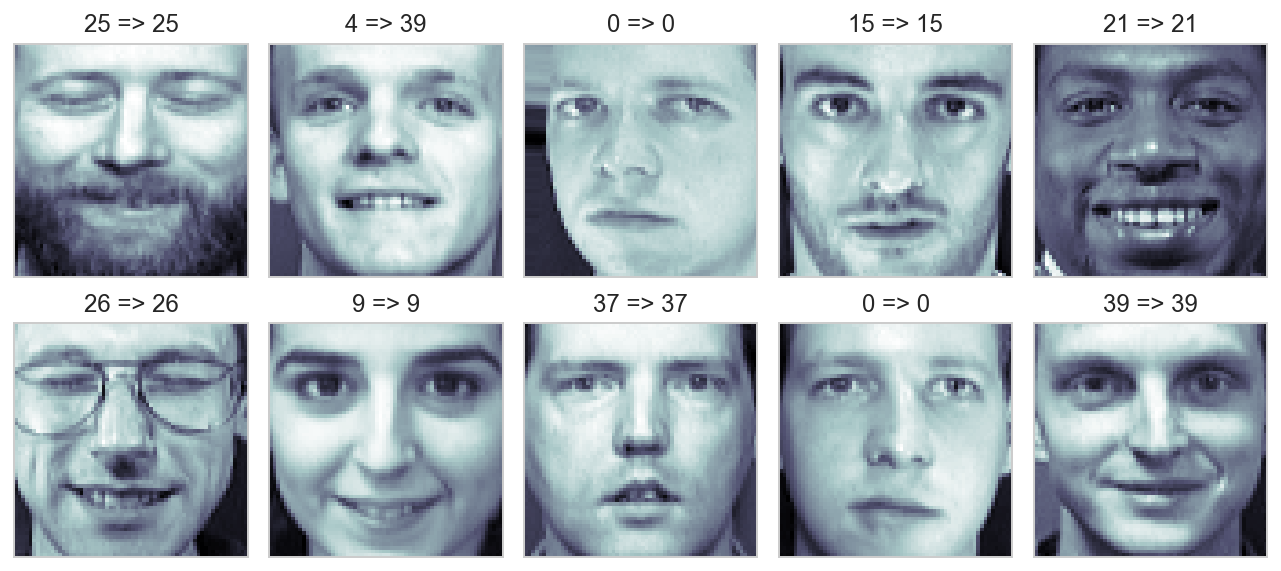

In [83]:
N = 2 ; M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc_1.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = svc_1.predict(X_train)
y_pred_test = svc_1.predict(X_test)

In [86]:
print (classification_report(y_pred_test, y_test))

             precision    recall  f1-score   support

          0       1.00      0.86      0.92         7
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         4
          3       1.00      0.50      0.67         4
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         5
          6       0.83      0.83      0.83         6
          7       0.67      1.00      0.80         2
          8       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         3
         10       1.00      1.00      1.00         6
         11       1.00      1.00      1.00         4
         12       1.00      0.67      0.80         6
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         6
         15       0.33      1.00      0.50         2
         16       1.00      0.67      0.80         3
         17       1.00      1.00      1.00   

# 커널 SVM
 - 선형으로 분리할 수 없는 데이터를 다루기 위한 커널 메서드
 - 원래 피처들의 비선형 조합을 만들어서 매핑함수를 이용하여 선형 분리 가능한 고차원의 공간에 투영
  $$k(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$
 - RBF(Radial Basis Function) 또는 가우시안 커널(Gaussian Kernel)
  $$k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$$

In [95]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

In [96]:
ksvm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
ksvm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

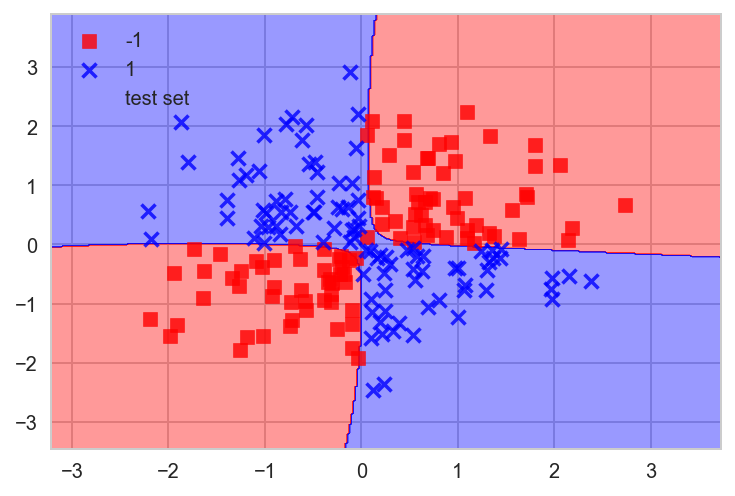

In [97]:
plot_decision_regions(X_xor, y_xor, classifier=ksvm)
plt.legend(loc='upper left')
plt.show()